In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Distributions support by `scipy`

`scipy.stats` package is typically imported as
```python
from scipy import stats
```

and when a specific distribution is frequently used, the distribution is imported as (e.g., for normal distribution)

```python
from scipy.stats import norm
```

Each package for random varibles (or distributions) includes the following methods:
- rvs: Random Variates
- pdf: Probability Density Function
- cdf: Cumulative Distribution Function
- sf: Survival Function (1-CDF)
- ppf: Percent Point Function (Inverse of CDF)
- isf: Inverse Survival Function (Inverse of SF)
- stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
- moment: non-central moments of the distribution

See the reference manual of `scipy.stats` for full-list of supported distributions: https://docs.scipy.org/doc/scipy/reference/stats.html


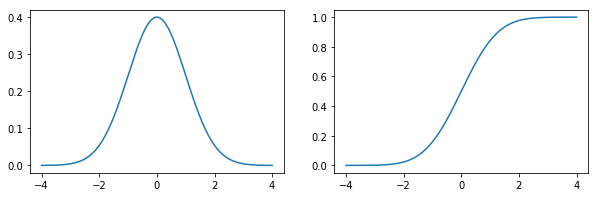

In [2]:
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10,3))
x = np.linspace(-4, 4, 601, endpoint=True)
# pdf
axes[0].plot(x, norm.pdf(x))
#axes[0].set_xlim((-4, 4))
#axes[0].set_ylim((0, 0.4))
# cdf
axes[1].plot(x, norm.cdf(x))
#axes[1].set_xlim((-4, 4))
#axes[1].set_ylim((0, 1))

Seaborn (https://seaborn.pydata.org/) is a matplotlib wrapper for statistical data visualization. It provides high-level interface for attractive statistical graphs.

In [3]:
import seaborn as sns

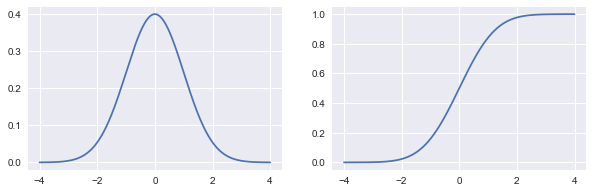

In [4]:
sns.set() # use seaborn default style
fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].plot(x, norm.pdf(x))
axes[1].plot(x, norm.cdf(x))

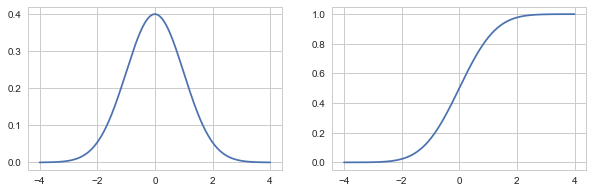

In [5]:
sns.set_style('whitegrid') # change style

fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].plot(x, norm.pdf(x))
axes[1].plot(x, norm.cdf(x))

Seaborn provides 4 contexts:
- notebook (default)
- paper
- talk
- poster

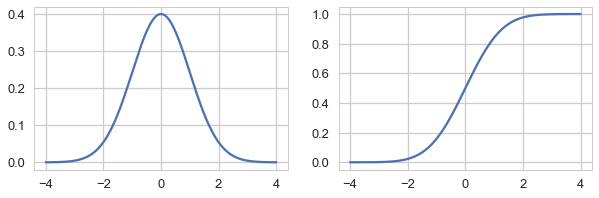

In [6]:
sns.set_context('talk') # making fonts larger, etc.

fig, axes = plt.subplots(1, 2, figsize=(10,3))
x = np.linspace(-4, 4, 601, endpoint=True)
axes[0].plot(x, norm.pdf(x))
axes[1].plot(x, norm.cdf(x))

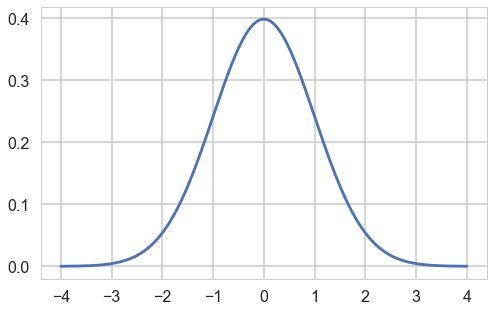

In [7]:
sns.set_context('poster') # making fonts even larger, etc.

fig = plt.figure(figsize=(8,5))
plt.plot(x, norm.pdf(x))

## Generating randome samples

Numpy provides methods to generate random sample with well-known distributions such as normal, binomial, uniform, poisson, etc.

See https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html#distributions

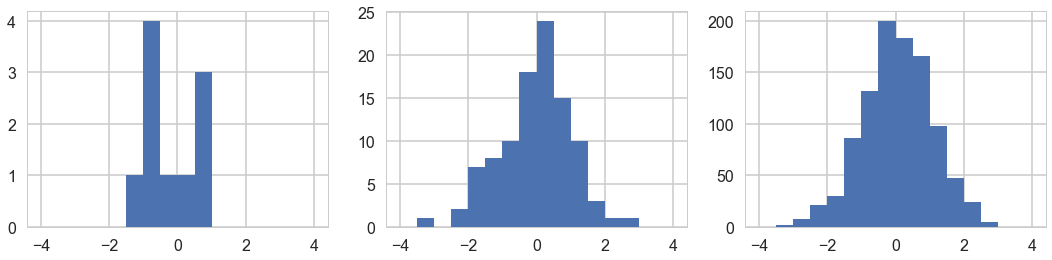

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
bins = np.linspace(-4, 4, 17, endpoint=True) # binsize=0.5
#bins = np.linspace(-4, 4, 9, endpoint=True) # binsize=1
for i, n in enumerate([10, 100, 1000]):
    axes[i].hist(np.random.normal(size=n), bins=bins)
fig.tight_layout()

## T-test

### One sample t-test

In [9]:
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print(population_ages.mean())
print(minnesota_ages.mean())

42.997056
40.08


You can simply call one function to run t-test as follows.

In [10]:
stats.ttest_1samp(a=minnesota_ages,               # Sample data
                  popmean=population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.0093155646578658, pvalue=0.050028470842087149)

### Two-sample t-test

In [11]:
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print(wisconsin_ages.mean())

43.42


In [12]:
stats.ttest_ind(a=minnesota_ages,
                b=wisconsin_ages,
                equal_var=False)

Ttest_indResult(statistic=-1.6155395531218597, pvalue=0.10940950439795941)

### Paired t-test

In [13]:
# dummy data


np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)
weight_df = pd.DataFrame({'weight_before':before,
                          'weight_after':after,
                          'weight_change':after-before})
weight_df.describe()             # Check a summary of the data

,weight_after,weight_before,weight_change
count,100.000000,100.000000,100.000000
mean,249.115171,250.345546,-1.230375
std,28.422183,28.132539,4.783696
min,165.913930,170.400443,-11.495286
25%,229.148236,230.421042,-4.046211
50%,251.134089,250.830805,-1.413463
75%,268.927258,270.637145,1.738673
max,316.720357,314.700233,9.759282


In [14]:
stats.ttest_rel(a = before, b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

## Chi-sqaured test

### Chi-squared test for goodness of fit

Generate fake data.

In [15]:
national = pd.DataFrame(['math']*100000 + ['phy']*60000 + ['chem']*50000 + ['bio']*15000 + ['engin']*35000,
                        columns=['major'])
dgist = pd.DataFrame(['math']*600 + ['phy']*300 + ['chem']*250 +['bio']*75 + ['engin']*150,
                     columns=['major'])
national_table = pd.crosstab(index=national['major'], columns='count')
dgist_table = pd.crosstab(index=dgist['major'], columns='count')

print('National')
print(national_table)
print(' ')
print('DGIST')
print(dgist_table)

National
col_0   count
major        
bio     15000
chem    50000
engin   35000
math   100000
phy     60000
 
DGIST
col_0  count
major       
bio       75
chem     250
engin    150
math     600
phy      300


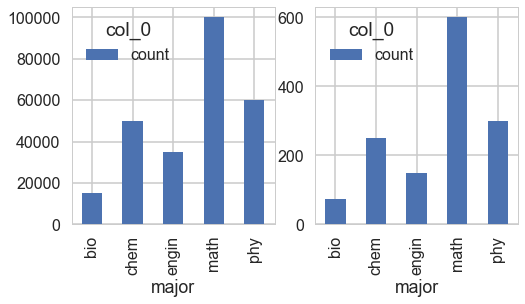

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
national_table.plot(kind='bar', ax=axes[0])
dgist_table.plot(kind='bar', ax=axes[1])

In [17]:
# crosstab() is similar to pivot_table()
pd.crosstab?

You can run chi-squared test by simply providing observed and expected data.

In [18]:
observed = dgist_table
national_ratios = national_table/len(national)  # Get population ratios
expected = national_ratios * len(dgist)   # Get expected counts
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=array([ 18.19480519]), pvalue=array([ 0.00113047]))

You can check critical value with chi-squared test statistics.

In [19]:
print('Critical value:', stats.chi2.ppf(q=0.95, df=4))

Critical value: 9.48772903678


### Chi-sqaure for independence

In [20]:
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ['asian','black','hispanic','other','white'],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ['democrat','independent','republican'],
                               p = [0.4, 0.2, 0.4],
                               size=1000)

voters = pd.DataFrame({'race':voter_race, 
                       'party':voter_party})
voter_tab = pd.crosstab(voters.race, voters.party, margins=True)
voter_tab.columns = ['democrat','independent','republican','row_totals']
voter_tab.index = ['asian','black','hispanic','other','white','col_totals']
observed = voter_tab.iloc[0:5,0:3]   # Get table without totals for later use
voter_tab

,democrat,independent,republican,row_totals
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
col_totals,397,186,417,1000


In [21]:
expected = np.outer(voter_tab.iloc[0:5, -1:],
                     voter_tab.iloc[-1:, 0:3])
expected = pd.DataFrame(expected)
expected.columns = ['democrat','independent','republican']
expected.index = ['asian','black','hispanic','other','white']
expected

,democrat,independent,republican
asian,23820,11160,25020
black,61138,28644,64218
hispanic,99647,46686,104667
other,15086,7068,15846
white,197309,92442,207249


In [22]:
stats.chi2_contingency(observed=observed)

(7.1693212801620589,
 0.51847939294884204,
 8,
 array([[  23.82 ,   11.16 ,   25.02 ],
        [  61.138,   28.644,   64.218],
        [  99.647,   46.686,  104.667],
        [  15.086,    7.068,   15.846],
        [ 197.309,   92.442,  207.249]]))

In [23]:
np.outer?

## ANOVA

### One-way ANOVA

In [24]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

Another examples.

In [25]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

In [26]:
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))    

asian black
Ttest_indResult(statistic=0.83864469097479799, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.67046690042407264)
asian other
Ttest_indResult(statistic=0.97952847396359999, pvalue=0.32988775000951509)
asian white
Ttest_indResult(statistic=-2.3181088112522881, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.051561971719525937)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.77957701111176592)
black white
Ttest_indResult(statistic=-5.3793038812818352, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.00046412986490666839)
other white
Ttest_indResult(statistic=-3.7638093220778721, pvalue=0.00018490576317593065)


Note: Examples are taken from scipy tutorials, seaborn tutorials and coursera courses.